# BASELINE MODEL

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import numpy as np
import scipy
import sys
from scipy import io
import cv2
import math
import random
import keras
from sklearn import preprocessing
from glob import glob

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# GLOBALS

In [2]:
POET_DIR = "D:/data/POETdataset/"
PATCHES_FILE = os.path.join(POET_DIR, "x.npy")
LABELS_FILE = os.path.join(POET_DIR, 'y.npy')
pascal_images = os.path.join(POET_DIR, 'PascalImages')
PATCH_SIZE = 32
HALF_PATCH = PATCH_SIZE//2
DATASET_SIZE = 6270
VALIDATION_PERC = 0.2
MAX_GAZE_POINTS = 3 # TEMPORARY
MIN_GAZE_POINTS = 3
VGG_NR_FEATURES = 512
user_index = 0 # TEMPORARY
BATCH_SIZE = 50
IMG_SIZE = 224

In [3]:
os.chdir(POET_DIR)

# DATA 

In [4]:
classes = [a.split("_")[1].split(".mat")[0] for a in glob("etData/*")]
idx2class = {i:c for i, c in enumerate(classes)}
class2idx = {c:i for i, c in enumerate(classes)}

In [87]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(IMG_SIZE, IMG_SIZE, 3), pooling=None, classes=10)

In [25]:
pred = vgg16.predict(np.array([img]))

In [26]:
pred[0].shape

(512,)

## We store the feature vectors for each image

In [35]:
classes

['aeroplane',
 'bicycle',
 'boat',
 'cat',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'sofa']

In [36]:
# def load_dataset():
x = []
y = []
filenames = glob("PascalImages/*")
for i, fn in enumerate(filenames):
  for cname in classes:
    if cname in fn:
      y_fn = class2idx[cname]
      y.append(y_fn)
      img = keras.preprocessing.image.load_img(fn, target_size=(IMG_SIZE, IMG_SIZE, 3))
      img = keras.preprocessing.image.img_to_array(img)
      feature_vec = vgg16.predict(np.array([img]))
      x.append(feature_vec)
x = np.array(x)
y = np.array(y)
      #   return np.array(x),np.array(y) 

In [39]:
np.save('vgg16-images.npy', x)

In [58]:
x = np.load('vgg16-images.npy')

(array([ 666.,  536.,  504., 1051.,  301.,  498., 1257.,  480.,  510.,
         467.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

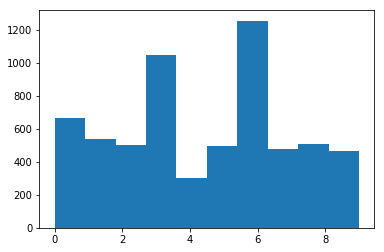

In [40]:
plt.hist(y)

In [42]:
preds = np.repeat(-1, len(y))

In [43]:
X_img = np.zeros((len(x), IMG_SIZE, IMG_SIZE, 3))

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
enc = OneHotEncoder()
y = y.reshape(-1,1)
enc.fit(y)
y_onehot = enc.transform(y)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [47]:
np.save('y.npy', y_onehot)

In [59]:
x = x[:,0,:]

In [60]:
x.shape

(6270, 512)

# MODEL

In [84]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(512,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
optm = keras.optimizers.rmsprop(lr=0.0001)
model.compile(loss='categorical_crossentropy',
                optimizer=optm,
                metrics=['accuracy'],)

In [86]:
model.fit(
         x,
         y_onehot,
         validation_split=0.2,
         epochs=100
)

Train on 5016 samples, validate on 1254 samples
Epoch 1/100
5016/5016 [==============================] - 1s 100us/step - loss: 6.7021 - acc: 0.5562 - val_loss: 16.0852 - val_acc: 0.0016
Epoch 2/100
5016/5016 [==============================] - 1s 103us/step - loss: 6.1472 - acc: 0.5907 - val_loss: 16.1050 - val_acc: 0.0000e+00
Epoch 3/100
5016/5016 [==============================] - 1s 103us/step - loss: 5.9081 - acc: 0.6091 - val_loss: 16.0923 - val_acc: 7.9745e-04
Epoch 4/100
5016/5016 [==============================] - 1s 103us/step - loss: 5.6661 - acc: 0.6246 - val_loss: 16.1005 - val_acc: 0.0000e+00
Epoch 5/100
5016/5016 [==============================] - 1s 100us/step - loss: 5.3740 - acc: 0.6392 - val_loss: 16.0601 - val_acc: 0.0016
Epoch 6/100
5016/5016 [==============================] - 1s 103us/step - loss: 4.8962 - acc: 0.6607 - val_loss: 16.0695 - val_acc: 7.9745e-04
Epoch 7/100
5016/5016 [==============================] - 1s 103us/step - loss: 4.7009 - acc: 0.6778 - val_lo